# 1.3.3 인구에 따른 살인 비율의 위치 추정

* 패키지 설치 `install.packages("dplyr", dependencies=TRUE)`

In [1]:
state <- read.csv(file="raw_data/state.csv")

평균

In [2]:
mean(state[["Population"]])

[1] 6162876

절사 평균(10%)

In [3]:
mean(state[["Population"]], trim=0.1)

[1] 4783697

중간값

In [4]:
median(state[["Population"]])

[1] 4436370

In [5]:
install.packages("matrixStats", dependencies=TRUE)

package 'matrixStats' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\LG\AppData\Local\Temp\RtmpQRbhDc\downloaded_packages


가중평균

In [6]:
weighted.mean(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.445834

In [7]:
library("matrixStats")

Warning message:
"package 'matrixStats' was built under R version 3.6.3"

In [8]:
weightedMedian(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.4

# 1.4.3 주별 인구의 변위 추정

표준편차

In [9]:
sd(state[["Population"]]) 

[1] 6848235

사분위범위

In [10]:
IQR(state[["Population"]])

[1] 4847308

중위절대편차

In [11]:
mad(state[["Population"]])

[1] 3849870

표준편차는 MAD의 거의 두배가 된다. 왜냐하면 표준편차는 특잇값에 민감하기 때문이다.

# 1.5.1 백분위수와 상자그림

In [12]:
quantile(state[["Murder.Rate"]], p=c(.05, .25, .5, .75, .95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

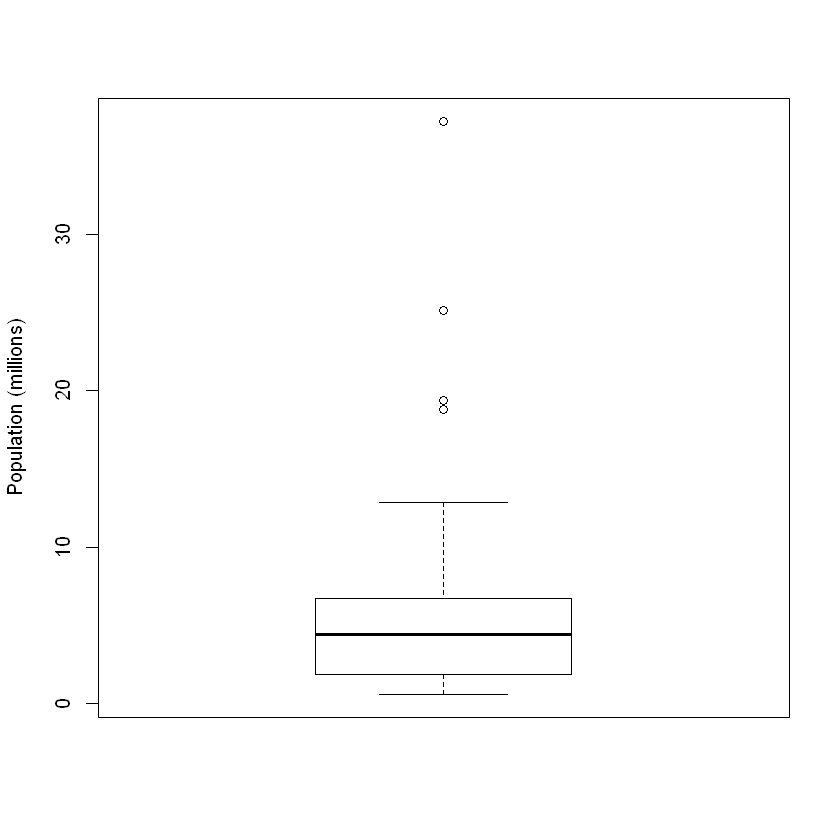

In [13]:
boxplot(state[["Population"]]/1000000, ylab="Population (millions)")

# 1.5.2 도수분포표와 히스토그램

In [14]:
breaks <- seq(from=min(state[["Population"]]),
             to=max(state[["Population"]]), length=11)
pop_freq <- cut(state[["Population"]], breaks=breaks,
               right=TRUE, include.lowest = TRUE)
table(pop_freq)

pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

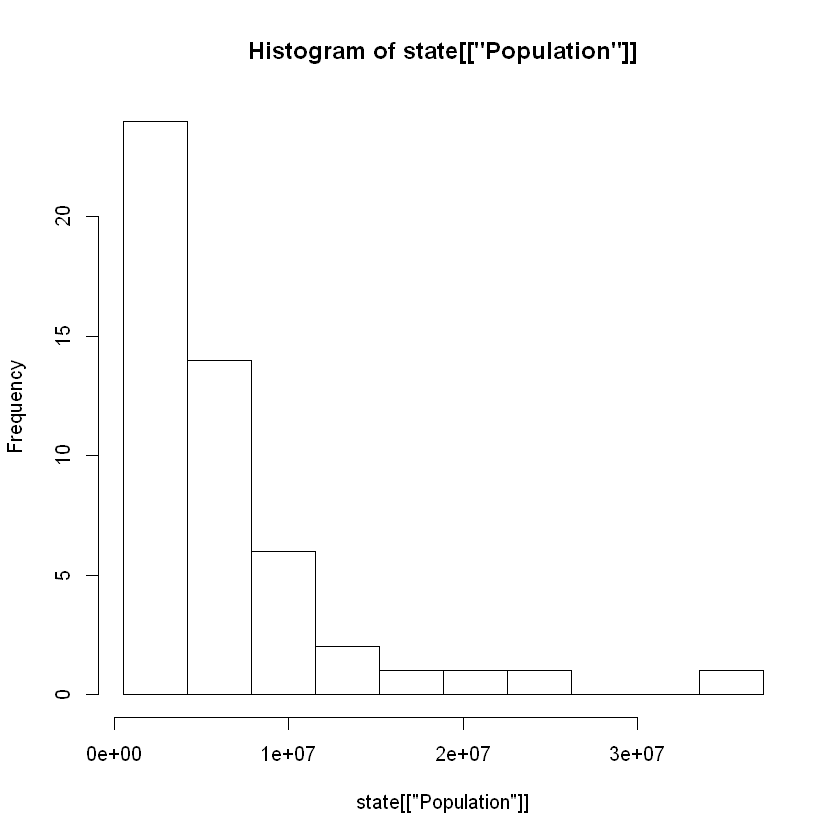

In [15]:
hist(state[["Population"]], breaks=breaks)

# 1.5.3 밀도 추정

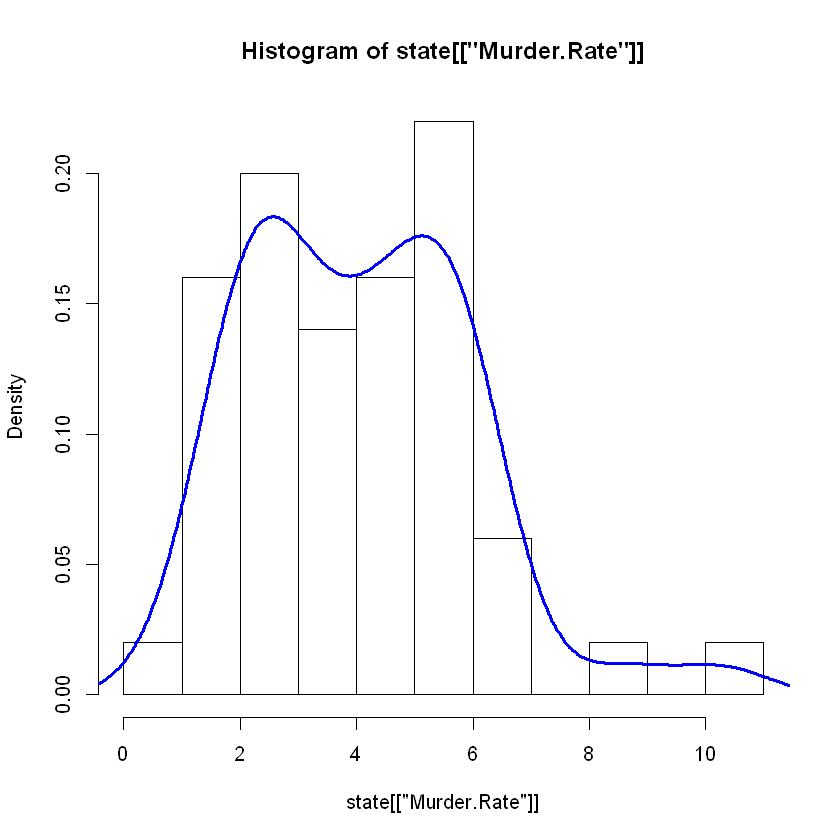

In [16]:
hist(state[["Murder.Rate"]], freq=FALSE)
lines(density(state[["Murder.Rate"]]), lwd=3, col="blue")

# 1.6 이진 데이터와 범주 데이터 탐색하기

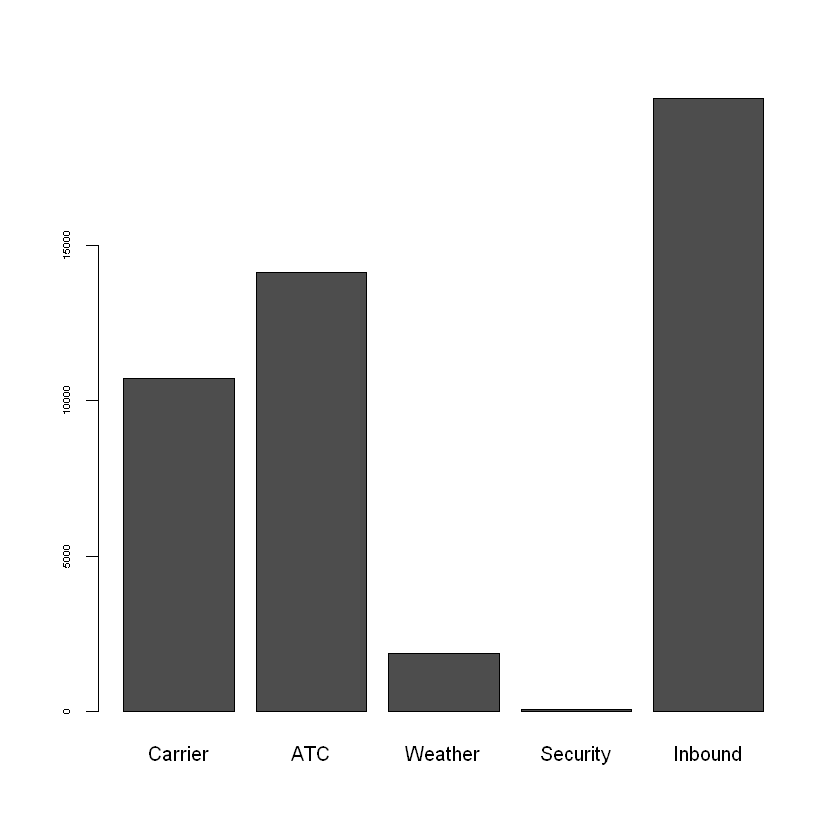

In [17]:
dfw <- read.csv(file="raw_data/dfw_airline.csv")
barplot(as.matrix(dfw)/6, cex.axis=.5)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


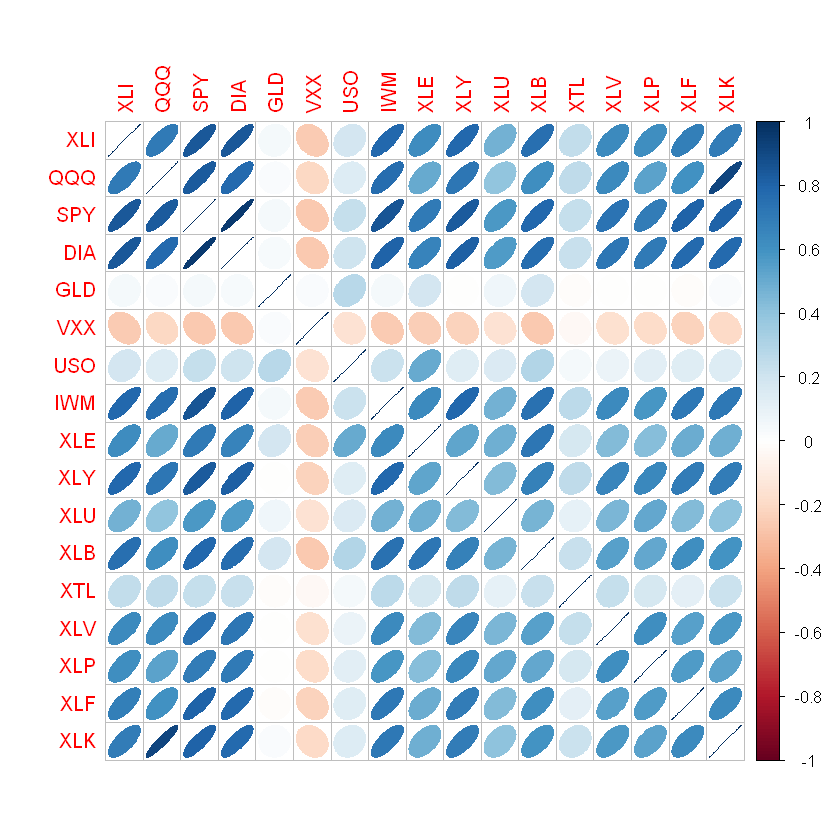

In [18]:
sp500_px <- read.csv(file="raw_data/sp500_px.csv")
sp500_sym <- read.csv(file="raw_data/sp500_sym.csv", stringsAsFactors = FALSE)
etfs<-sp500_px[row.names(sp500_px)>"2012-07-01",
             sp500_sym[sp500_sym$sector=="etf", 'symbol']]

library(corrplot)
corrplot(cor(etfs), method="ellipse")

얇고 진할수록 더 강한 상관관계를 나타낸다. 상관계수는 데이터의 특잇값에 민감하다.

# 1.7.1 산점도

In [19]:
telecom <- sp500_px[, sp500_sym[sp500_sym$sector=="telecommunications_services", 'symbol']]
telecom <- telecom[row.names(telecom)>"2012-07-01", ]
telecom_cor <- cor(telecom)

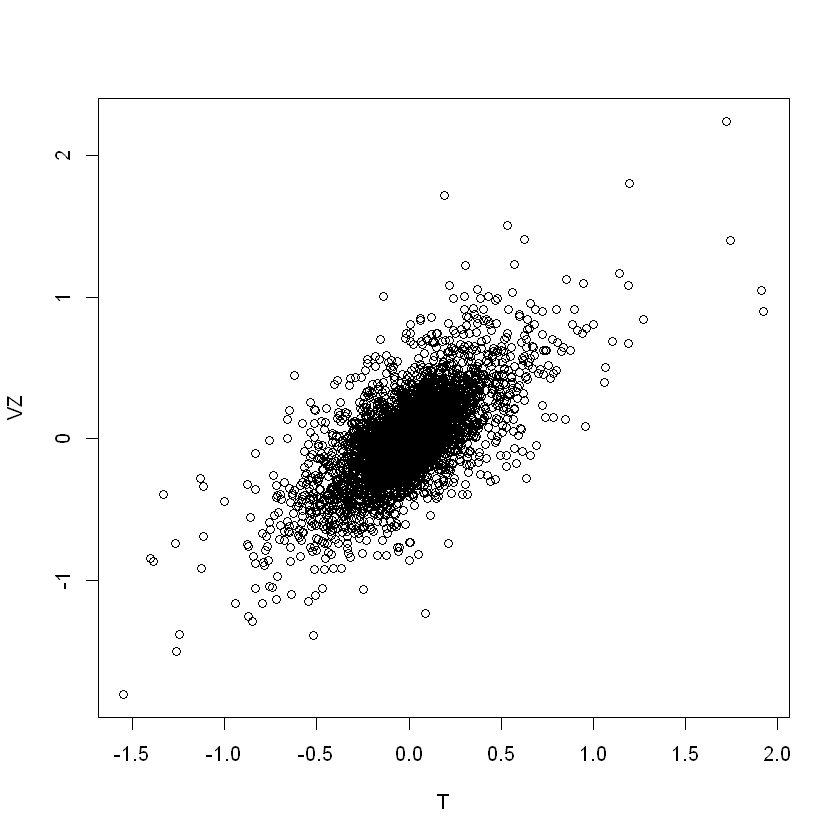

In [20]:
plot(telecom$T, telecom$VZ, xlab="T", ylab="VZ")

# 1.8.1 육각형 구간과 등고선(수치형 변수 대 수채형 변수를 시각화)

In [21]:
kc_tax <- read.csv(file="raw_data/kc_tax.csv")
kc_tax0 <- subset(kc_tax, TaxAssessedValue < 750000 & SqFtTotLiving>100 &
                  SqFtTotLiving<3500)
nrow(kc_tax0)

[1] 432693

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

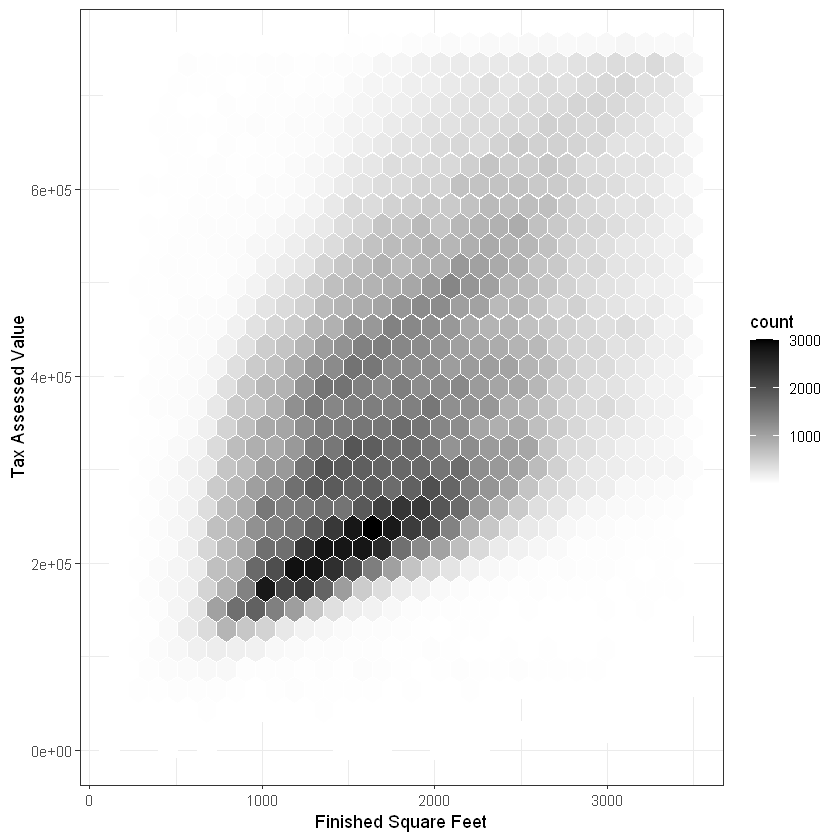

In [22]:
library(ggplot2)
ggplot(kc_tax0, (aes(x=SqFtTotLiving, y=TaxAssessedValue))) + 
  stat_binhex(colour="white") + 
  theme_bw() + 
  scale_fill_gradient(low="white", high="black") +
  labs(x="Finished Square Feet", y="Tax Assessed Value")

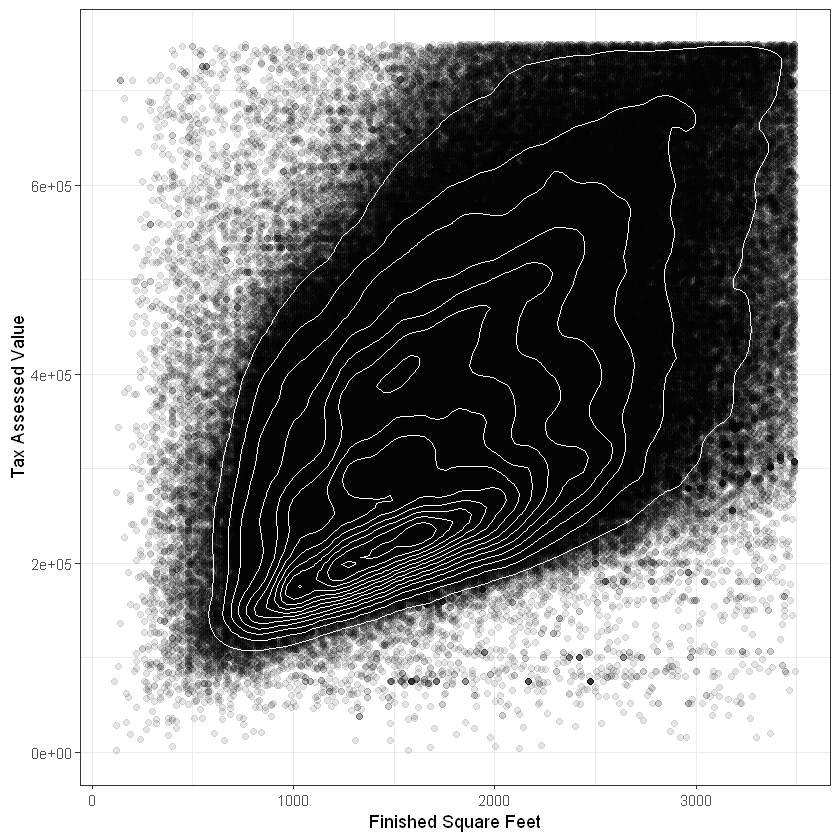

In [23]:
ggplot(kc_tax0, aes(SqFtTotLiving, TaxAssessedValue)) +
  theme_bw() + 
  geom_point( alpha=0.1) + 
  geom_density2d(colour="white") + 
  labs(x="Finished Square Feet", y="Tax Assessed Value")

# 1.8.2 범주형 변수 대 범주형 변수

In [26]:
library(descr)

lc_loans <- read.csv(file="raw_data/lc_loans.csv")
x_tab<-CrossTable(lc_loans$grade, lc_loans$status,
                 prop.c=FALSE, prop.chisq=FALSE, prop.t=FALSE)

airline_stats <- read.csv(file="raw_data/airline_stats.csv", stringsAsFactors = FALSE)
airline_stats$airline <- ordered(airline_stats$airline, levels=c('Alaska', 'American', 'Jet Blue', 'Delta', 'United', 'Southwest'))

tots <- cbind(row.names(x_tab$tab), format(cbind(x_tab$tab, x_tab$rs)))
props <- cbind("", format(cbind(x_tab$prop.row, x_tab$rs/x_tab$gt), digits=1))
c_tot <- c("Total", format(c(x_tab$cs, x_tab$gt)))

asc_tab <- matrix(nrow=nrow(tots)*2+1, ncol=ncol(tots))
colnames(asc_tab) <- c("Grade", colnames(x_tab$tab), "Total")
idx <- seq(1, nrow(asc_tab)-1, by=2)
asc_tab[idx,] <- tots
asc_tab[idx+1,] <- props
asc_tab[nrow(asc_tab), ] <- c_tot

In [29]:
x_tab

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

                  lc_loans$status
lc_loans$grade    Charged Off   Current   Fully Paid    Late    Total
---------------------------------------------------------------------
A                        1562     50051        20408     469    72490
                        0.022     0.690        0.282   0.006    0.161
---------------------------------------------------------------------
B                        5302     93852        31160    2056   132370
                        0.040     0.709        0.235   0.016    0.294
---------------------------------------------------------------------
C                        6023     88928        23147    2777   120875
                        0.050     0.736        0.191   0.023    0.268
---------------------------------------------------------------------
D                        5007     53281        13681    2308   

# 1.8.3 범주형 변수 대 수치형 변수

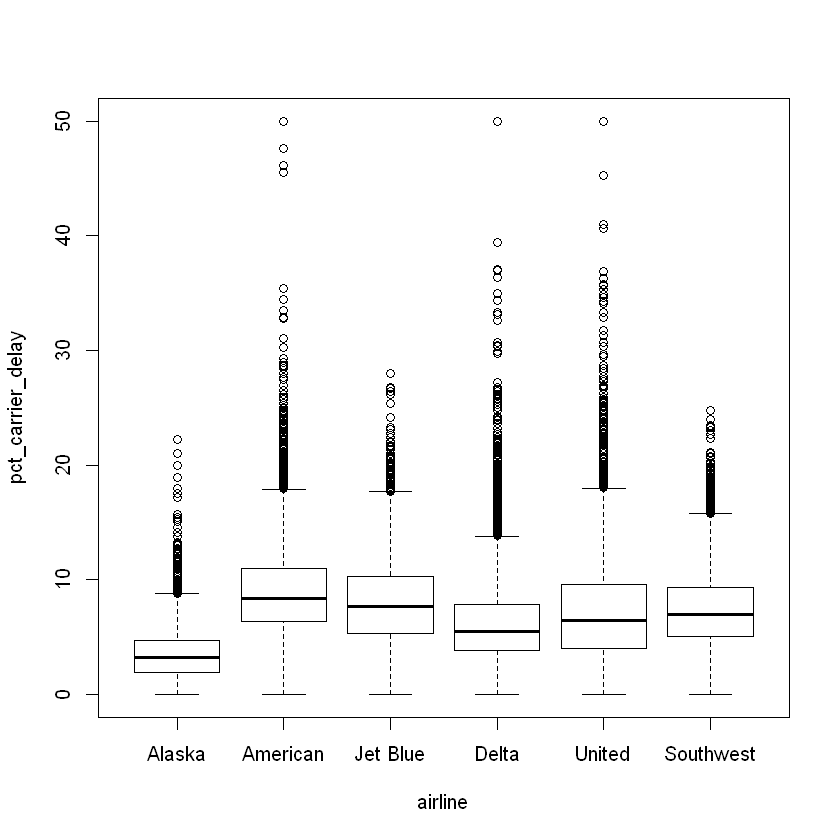

In [27]:
boxplot(pct_carrier_delay ~ airline, data=airline_stats, ylim=c(0,50))

Warning message:
"Removed 38 rows containing non-finite values (stat_ydensity)."

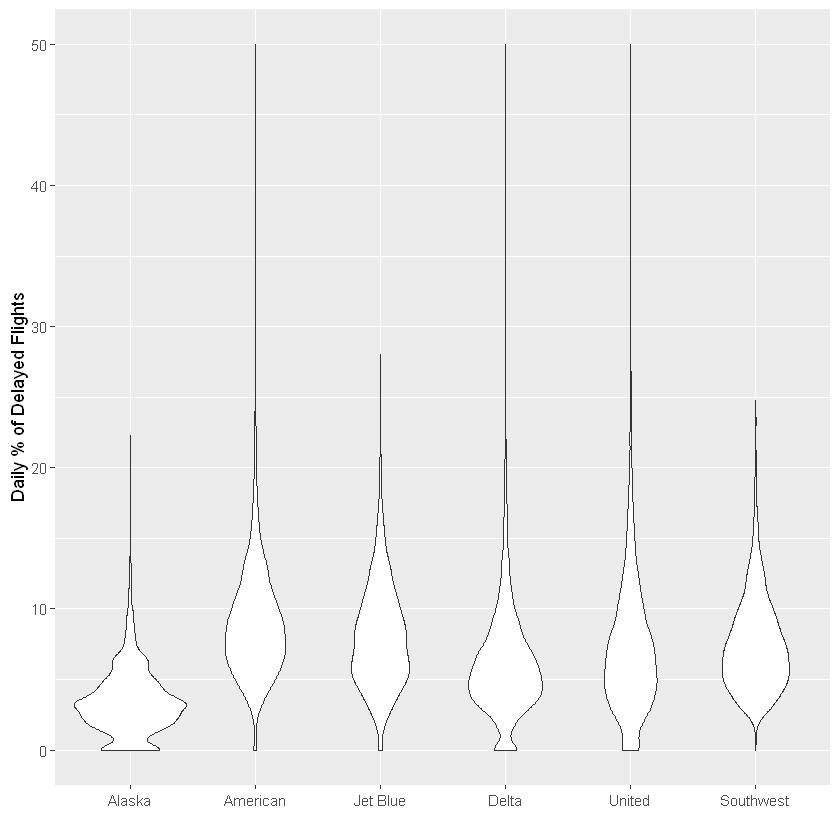

In [28]:
ggplot(data=airline_stats, aes(airline, pct_carrier_delay))  + 
  ylim(0, 50) + 
  geom_violin() +
  labs(x="", y="Daily % of Delayed Flights")

# 1.8.4 다변수 시각화하기

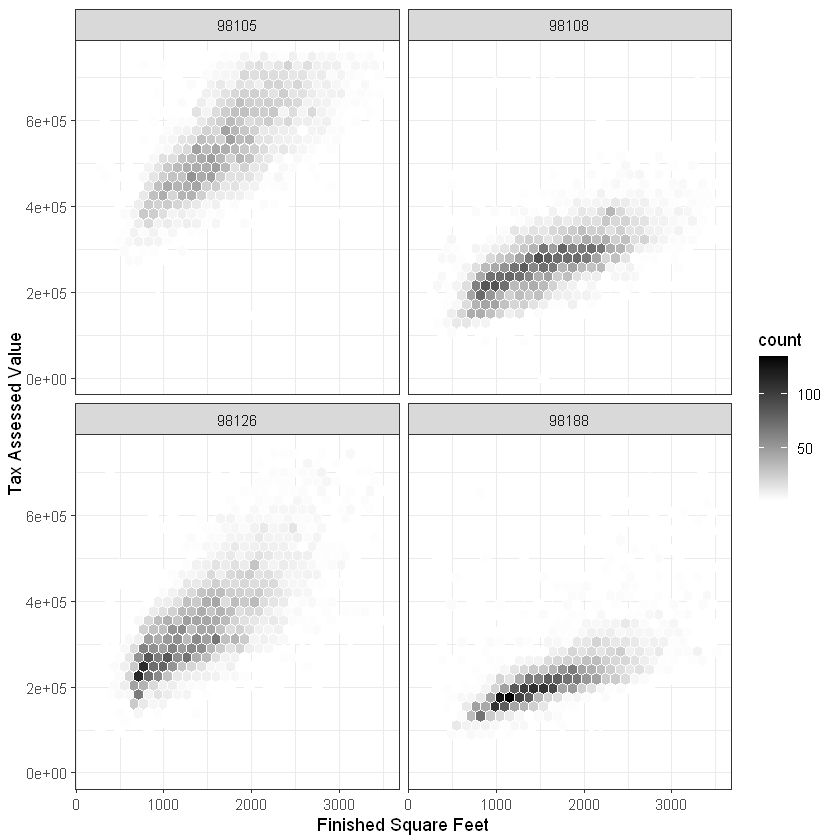

In [30]:
ggplot(subset(kc_tax0, ZipCode %in% c(98188, 98105, 98108, 98126)),
         aes(x=SqFtTotLiving, y=TaxAssessedValue)) + 
  stat_binhex(colour="white") + 
  theme_bw() + 
  scale_fill_gradient( low="white", high="black") +
  labs(x="Finished Square Feet", y="Tax Assessed Value") +
  facet_wrap("ZipCode")